In [ ]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
heartData = pd.read_csv("heart-failure-prediction/heart.csv")
heartData.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


             Ungesund     Gesund
Geschlecht                      
Männer      56.028369  43.971631
Frauen      21.978022  78.021978


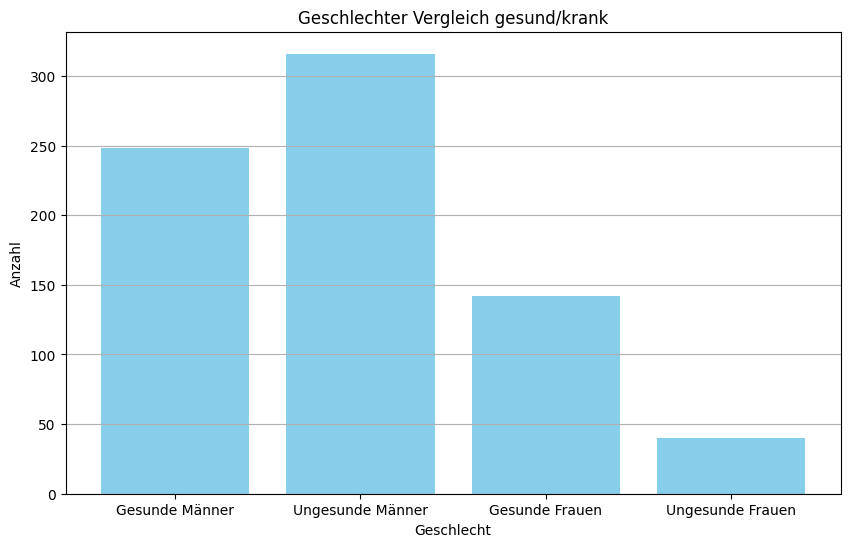

In [4]:
#Aussortieren von leeren Cholesterin Beobachtungen
heartData = heartData[heartData["Cholesterol"]!=0]

#Anzahl der Männer und Frauen in ungesunden Gruppen zählen
unhealthyMenCount = (heartData[heartData["HeartDisease"] == 1]["Sex"] == "M").sum()
unhealthyFemaleCount = (heartData[heartData["HeartDisease"] == 1]["Sex"] == "F").sum()

#Anzahl der Männer und Frauen in gesunden Gruppen zählen
healthyMenCount = (heartData[heartData["HeartDisease"] == 0]["Sex"] == "M").sum()
healthyFemaleCount = (heartData[heartData["HeartDisease"] == 0]["Sex"] == "F").sum()

totalMen = unhealthyMenCount + healthyMenCount
totalFemale = unhealthyFemaleCount + healthyFemaleCount

data = {
    "Geschlecht": ["Männer", "Frauen"],
    "Ungesund": [(unhealthyMenCount/totalMen)*100, (unhealthyFemaleCount/totalFemale)*100],
    "Gesund": [(healthyMenCount/totalMen)*100, (healthyFemaleCount/totalFemale)*100]
}

df = pd.DataFrame(data)

# Anpassen des Index und Hinzufügen eines Summenwerts
df.set_index("Geschlecht", inplace=True)

# Anzeigen der Kreuztabelle
print(df)

#Balkendiagramm erstellen
values = [healthyMenCount, unhealthyMenCount, healthyFemaleCount, unhealthyFemaleCount]
categories = ["Gesunde Männer", "Ungesunde Männer", "Gesunde Frauen", "Ungesunde Frauen"]
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color="skyblue")
plt.title("Geschlechter Vergleich gesund/krank")
plt.xlabel("Geschlecht")
plt.ylabel("Anzahl")
plt.grid(axis="y")
plt.show()

# Problem
Bei der Statistik sehen wir ein um 3-Fach größere Abfrage von Männern, was eine aussagekräftigen Vergleich zwischen Männern und Frauen verzerren kann.
Sollte ein Gewichtungsfaktor von 3 für Frauen  berechnet werden, kann es dazu führen, dass die Varianz in den Daten für Frauen überbetont wird, da sie nun dreimal so stark gewichtet sind wie Männer und ebenfalls Ergebnisse verzerrt.
Hinzu kommt, dass zu wenige Daten zu ungesunden Frauen gegeben sind im Vergleich zur Anzahl der Beobachtung zu ungesunden Männern.

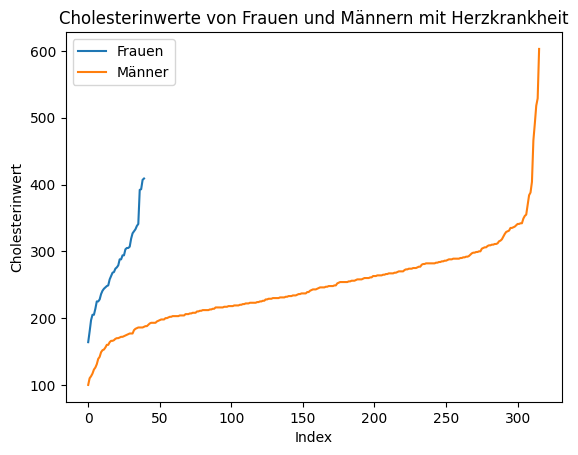

In [5]:
femaleCholesterol = heartData[(heartData["HeartDisease"] == 1) & (heartData["Sex"] == "F")]["Cholesterol"]
sortedFemaleCholesterol = femaleCholesterol.sort_values().reset_index(drop=True)
menCholesterol = heartData[(heartData["HeartDisease"] == 1) & (heartData["Sex"] == "M")]["Cholesterol"]
sortedMenCholesterol = menCholesterol.sort_values().reset_index(drop=True)

plt.plot(sortedFemaleCholesterol, label="Frauen")
plt.plot(sortedMenCholesterol, label="Männer")
plt.title("Cholesterinwerte von Frauen und Männern mit Herzkrankheit")
plt.ylabel("Cholesterinwert")
plt.xlabel("Index")
plt.legend()
plt.show()

# Unterschiede von Cholesterinwerten zwischen Mann und Frau
Beachtet man nur die Frauen und Männer mit Herzkreislauferkrankung anhand ihrer Cholesterinwerte, zeigt die Abbidlung, dass eine zu niedrige Anzahl an Beobachtung von Frauen gegeben ist, um einen aussagekräftigen Vergleich machen zu können.

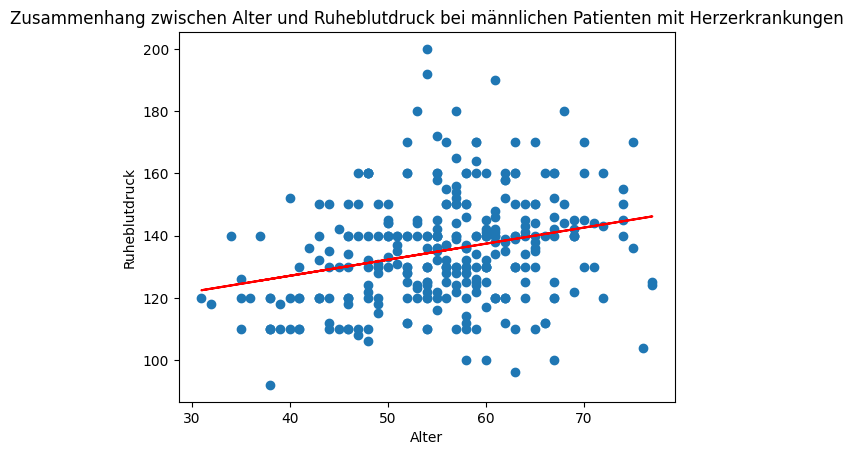

In [41]:
unhealthyData = heartData[(heartData["HeartDisease"] == 1) & (heartData["Sex"] == "M")]

plt.title("Zusammenhang zwischen Alter und Ruheblutdruck bei männlichen Patienten mit Herzerkrankungen")
plt.scatter(unhealthyData["Age"], unhealthyData["RestingBP"])
m, b = np.polyfit(unhealthyData["Age"], unhealthyData["RestingBP"], 1)
plt.plot(unhealthyData["Age"], m*unhealthyData["Age"] + b, color='red', label='Trendlinie')
plt.xlabel("Alter")
plt.ylabel("Ruheblutdruck")
plt.show()